# Сборный проект

**Цель:** выявить закономерности, определяющие успешность игры. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы.

**Описание данных**

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [1]:
#подключение необходимых библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

## Загрузка данных

In [2]:
#загрузка файла с данными
data = pd.read_csv('/datasets/games.csv')
data

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [3]:
#общая информация об датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Уже по общей информации можно сделать вывод, что в наших данных присутствуют пропуски.

## Предобработка данных

In [4]:
#высчитаем сколько строк было в датасете до предобработки
x = data.shape[0]
print('Количество строк до предобработки: ', x)

Количество строк до предобработки:  16715


In [5]:
#проверим датасет на наличие пропусков
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Можем убидиться, что пропуски пристутствуют в столбцах 'Name', 'Year_of_Release', 'Critic_Score', 'User_Score', 'Rating'.

In [6]:
#приведение названия колонок к нижнему регистру
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Избавимся от пропусков в столбцах 'year_of_release', 'name' (удалим строки с пропусками в этих столбцах, так как их не очень много и на ход анализа это не повлияет). А также изменим тип данных в столбце 'year_of_release'.

In [7]:
data = data[(~data['year_of_release'].isna())&(~data['name'].isna())]
data = data.reset_index(drop=True)
data['year_of_release'] = data['year_of_release'].astype('int')
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [8]:
data[data['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
300,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
516,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
639,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
709,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16424,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16426,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16427,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16433,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


Разберёмся c пропусками в столбцах 'critic_score', 'user_score' и со значением *tbd* в столбце 'user_score'. Данная абревиатура обозначает, что рейтинг не определён (возможно было выставлено мало оценок пользователями). Заменим *tbd* на пропуски и изменим тип данных на float. Пропусков в столбце 'critic_score' 8578, 'user_score' 6701, а значений *tbd*
2376, в процентном соотношении к количеству всех строк датафрейма это очень много, поэтому не целесообразно удалить строки с этими пропусками или заменять их на медиану или среднее.

Столбец 'rating' точно трогать не будем, так как нет данных, которые помогли бы определить возрастной рейтинг самостоятельно.

In [9]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = data.loc[1][10]
data['user_score'] = data['user_score'].astype('float')

In [10]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [11]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

In [12]:
data.loc[data['rating'].isna(), 'rating'] = 'undefined'
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,undefined
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,undefined
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,undefined
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,undefined


<div class="alert alert-info"> <b>Комментарий студента:</b> 
    
Заменила пропуски в столбце 'rating' на undefined.

</div>

Проверим столбцы 'genre', 'platform', 'name' на наличие неявных дупликатов.

In [13]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [14]:
data['name'].duplicated().sum()

5018

In [15]:
data['name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

In [16]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

При просмотре неявные дупликаты не обнаружены.

Проверим датасет на наличие явных дупликатов.

In [17]:
data.duplicated().sum()

0

In [18]:
data[data.duplicated(subset = ['name', 'platform', 'genre', 'rating'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1574,Need for Speed: Most Wanted,X360,2005,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T
11534,Need for Speed: Most Wanted,PC,2012,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T
15969,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.00,0.00,83.0,5.5,E


In [19]:
data[(data['platform'] == 'X360')&(data['name'] == 'Need for Speed: Most Wanted')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1177,Need for Speed: Most Wanted,X360,2012,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1574,Need for Speed: Most Wanted,X360,2005,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T


In [20]:
data[(data['platform'] == 'PC')&(data['name'] == 'Need for Speed: Most Wanted')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
5883,Need for Speed: Most Wanted,PC,2005,Racing,0.02,0.23,0.0,0.04,82.0,8.5,T
11534,Need for Speed: Most Wanted,PC,2012,Racing,0.00,0.06,0.0,0.02,82.0,8.5,T


In [21]:
data[(data['platform'] == 'PS3')&(data['name'] == 'Madden NFL 13')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
600,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
15969,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


'Need for Speed: Most Wanted' у данной игры есть две версии с разной датой выпуска, поэтому её удалять не нужно.
'Madden NFL 13' а эту игру стоит удалить.

In [22]:
data = data.drop_duplicates(subset = ['name', 'year_of_release', 'platform', 'genre', 'rating'])
data.reset_index(drop=True)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined
...,...,...,...,...,...,...,...,...,...,...,...
16438,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,undefined
16439,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,undefined
16440,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,undefined
16441,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,undefined


Таким образом, явные дупликаты отсутствуют.
Далее просуммирум продажи во всех регионах и добавим их в отдельный столбец.

In [23]:
columns_name = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
data['sum_sales'] = data[columns_name].sum(axis = 1)
data

/tmp/ipykernel_278/2549313136.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sum_sales'] = data[columns_name].sum(axis = 1)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undefined,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01
16440,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,undefined,0.01
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01
16442,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,undefined,0.01


**Вывод**

В разделе предобработка данных была проведена следующая работа:
- Убедились, что пристутствуют в столбцах 'Name', 'Year_of_Release', 'Critic_Score', 'User_Score', 'Rating'.
- Привели названия колонок к нижнему регистру.
- Удалили строки с пропусками в столбцах 'year_of_release', 'name'.
- Изменили типы данных в столбцах 'year_of_release' на *int*, 'user_score' на *float*.
- Заменили значение *tbd* на пропуски, для удобства дальнейшей работы.
- Заменила пропуски в столбце 'rating' на undefined
- Убедились в отсутствии явных.
- Был найден 1 неявный дупликат и удален.
- Просуммировали продажи во всех регионах и добавили их в отдельный столбец.

## Исследовательский анализ.

Построю график и посмотрю, сколько игр выпускалось в разные годы.

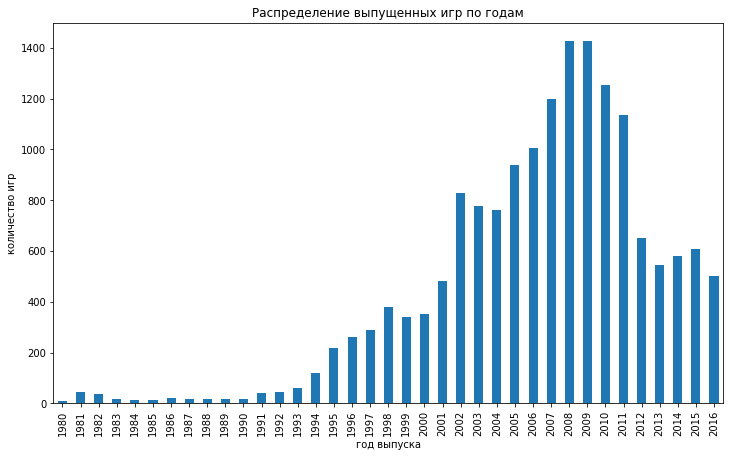

In [24]:
data.groupby('year_of_release')['year_of_release'].count().plot(kind='bar', figsize = (12,7))
plt.title('Распределение выпущенных игр по годам')
plt.xlabel('год выпуска')
plt.ylabel('количество игр')
plt.show()

По полученному графику можно увидеть, что количество выпущенных игр за год начинает увеличивается в 1991 год, достигает пика на уровне 2008 и 2009 года, далее постепенно уменьшается.

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [25]:
data.groupby('platform')['sum_sales'].sum().sort_values(ascending = False)

platform
PS2     1233.56
X360     961.24
PS3      931.33
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: sum_sales, dtype: float64

Возьмём 6 платформ с наибольшими суммарными продажами и построим распределение. Для платформы DS уберём значение 1985, так как оно сильно выбивается и 1985 год точно нельзя отнести к актуальному.

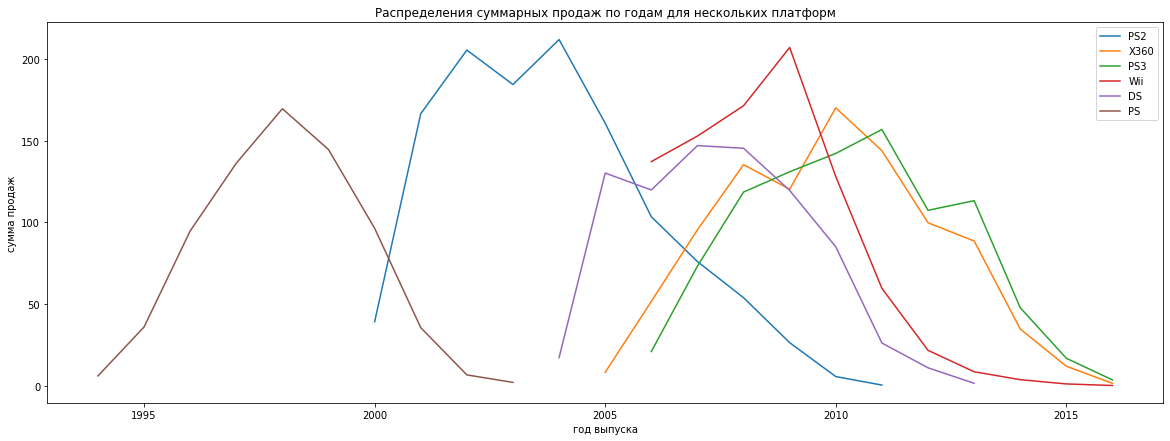

In [26]:
znach_platform = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
for i in znach_platform:
    data[(data['platform'] == i)&(data['year_of_release'] != 1985)].groupby('year_of_release')['sum_sales'].sum().plot(figsize = (20,7))
plt.title('Распределения суммарных продаж по годам для нескольких платформ')
plt.xlabel('год выпуска')
plt.ylabel('сумма продаж')
plt.legend(znach_platform, loc='upper right')
plt.show()

Будем считать актуальным период с 2012 года, судя по распрделению выпущенных игр по годам. Закончится актуальный период в 2016 году.

Выделем данные за этот период и будем работать с ними.

На примере платформы PS между появлением новой платформы и исчезновением старой проходит 3 - 6 лет.

In [27]:
data_actual = data[data['year_of_release'] >= 2012]
data_actual

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,undefined,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,undefined,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16432,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01
16436,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01


In [28]:
data_actual.groupby('platform')['sum_sales'].sum().sort_values(ascending = False)

platform
PS4     314.14
PS3     288.78
X360    236.54
3DS     194.61
XOne    159.32
WiiU     82.19
PC       62.65
PSV      49.18
Wii      35.37
DS       12.55
PSP      11.19
Name: sum_sales, dtype: float64

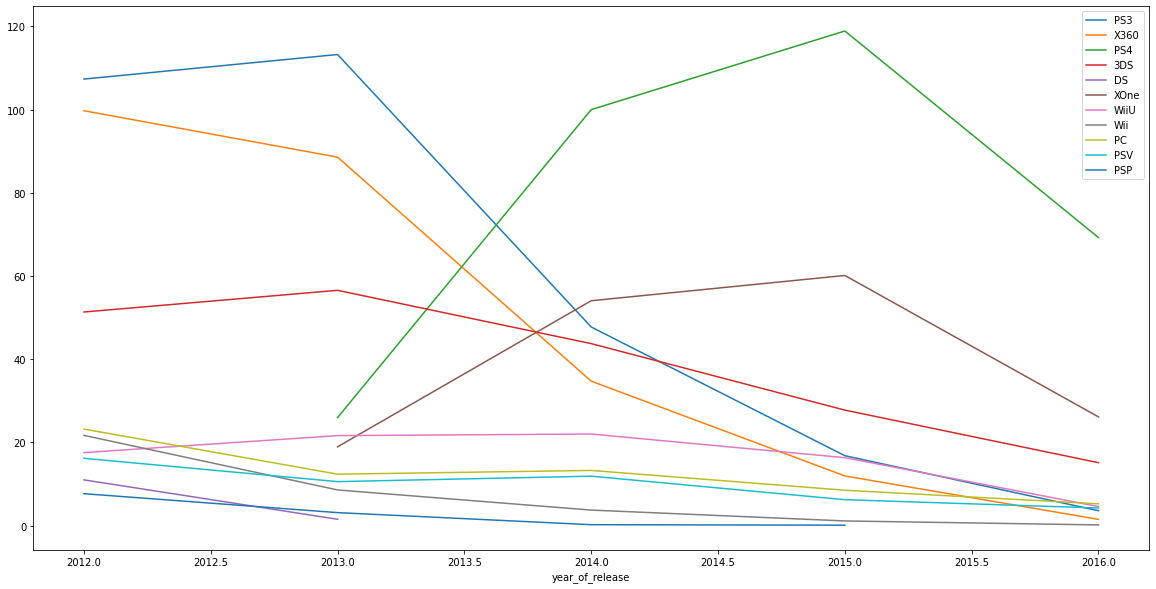

In [29]:
for i in data_actual['platform'].unique():
    data_actual[data_actual['platform'] == i].groupby('year_of_release')['sum_sales'].sum().plot(figsize = (20,10))
    
plt.legend(data_actual['platform'].unique(), loc='upper right')

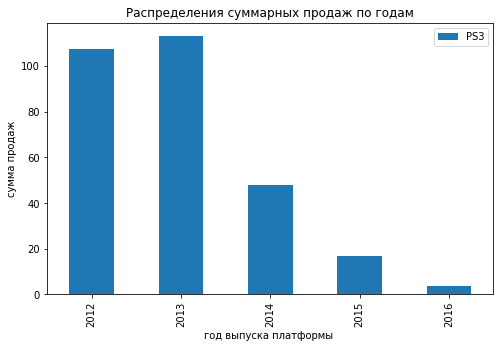

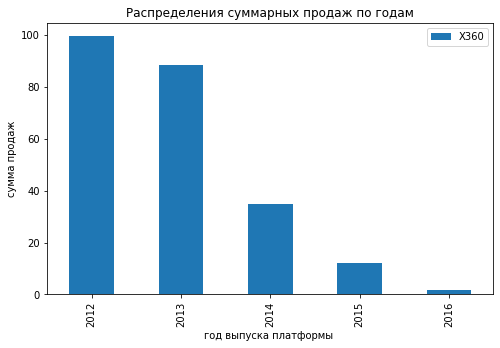

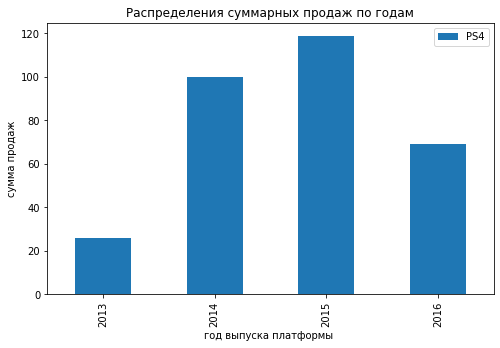

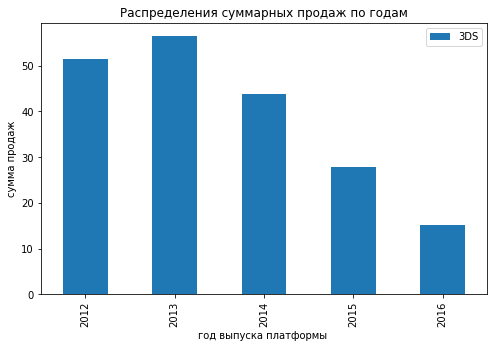

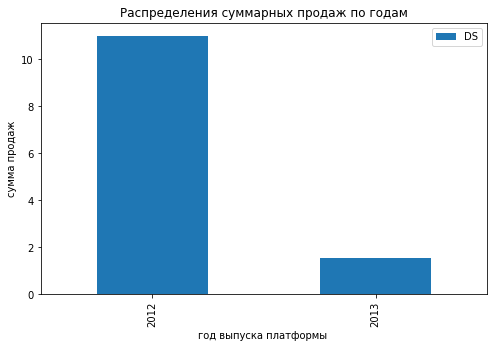

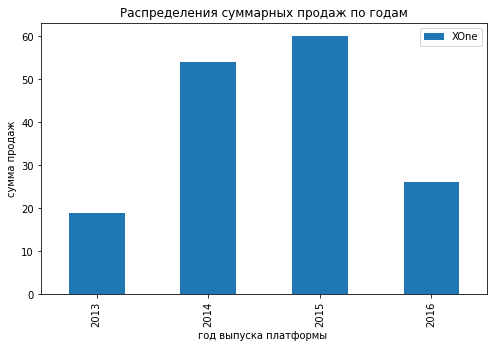

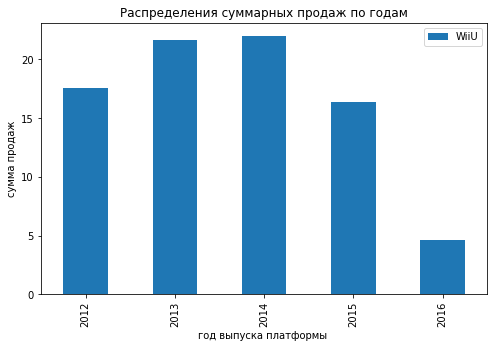

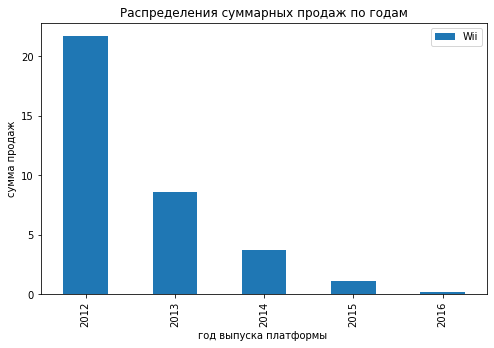

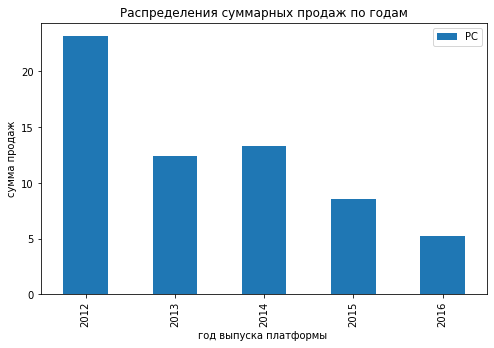

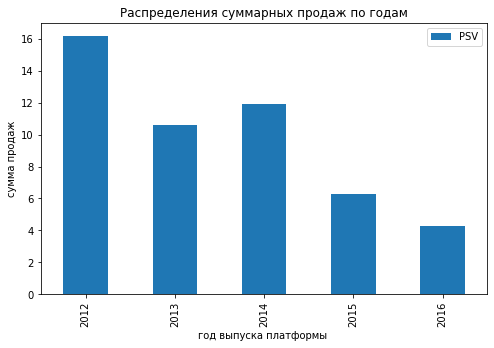

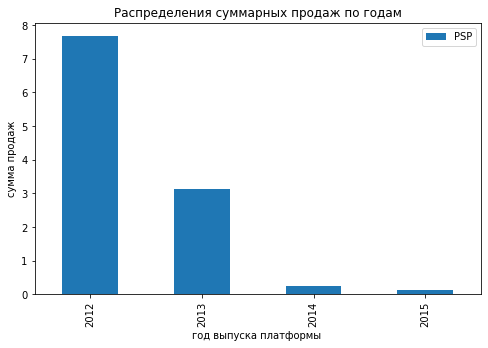

In [30]:
for i in data_actual['platform'].unique():
    data_actual[data_actual['platform'] == i].groupby('year_of_release')['sum_sales'].sum().plot(kind = 'bar',figsize = (8,5), label = i)
    plt.title('Распределения суммарных продаж по годам')
    plt.xlabel('год выпуска платформы ')
    plt.ylabel('сумма продаж')
    plt.legend(loc='upper right')
    plt.show()

Будем считать, что самые лидирующие платформы PS4 и XOne, так как до 2016 года суммарные продажи на этих платформах растут, а в 2016 произошёл спад, но мы значем, что данные предоставленные за этот год неполные.

In [31]:
leading_platform = data_actual[(data_actual['platform'] == 'XOne')|(data_actual['platform'] == 'PS4')]
leading_platform

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,undefined,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,undefined,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16359,Sébastien Loeb Rally Evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63.0,8.2,E,0.01
16372,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,NaN,6.6,E,0.01
16374,ZombiU,XOne,2016,Action,0.00,0.01,0.00,0.00,NaN,NaN,undefined,0.01
16389,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74.0,6.7,undefined,0.01


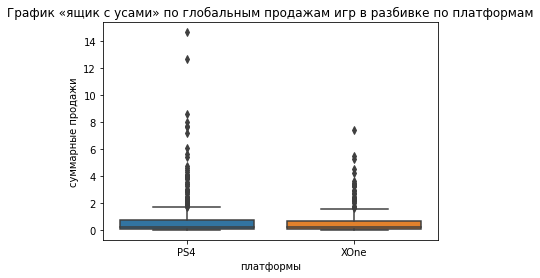

In [32]:
ax = sns.boxplot(data = leading_platform, x = 'platform', y = 'sum_sales')
ax.set_title('График «ящик с усами» по глобальным продажам игр в разбивке по платформам')
ax.set_ylabel('суммарные продажи')
ax.set_xlabel('платформы')
plt.show()

<div class="alert alert-info"> <b>Комментарий студента:</b> 
    
Добавила подписи по осям и назания.

</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера 😊 v_2 <a class="tocSkip"> </h2>

Отлично!)

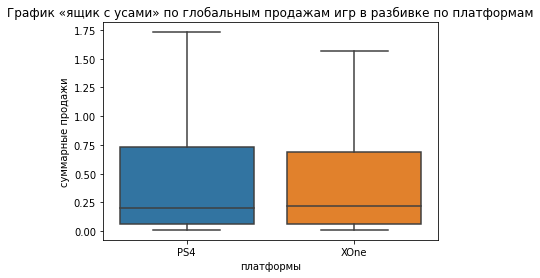

In [33]:
ax = sns.boxplot(data = leading_platform, x = 'platform', y = 'sum_sales', showfliers=False)
ax.set_title('График «ящик с усами» по глобальным продажам игр в разбивке по платформам')
ax.set_ylabel('суммарные продажи')
ax.set_xlabel('платформы')
plt.show()

Можно сделать вывод, что медиана у двух платформ равна примерно 0.2, также есть много выбросов доходящих в случае PS4 15 миллионов, а в случае XOne 7 миллионов.

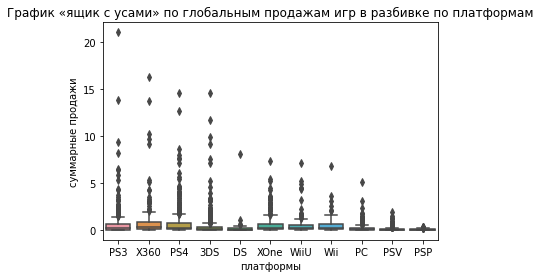

In [34]:
ax = sns.boxplot(data = data_actual, x = 'platform', y = 'sum_sales')
ax.set_title('График «ящик с усами» по глобальным продажам игр в разбивке по платформам')
ax.set_ylabel('суммарные продажи')
ax.set_xlabel('платформы')
plt.show()

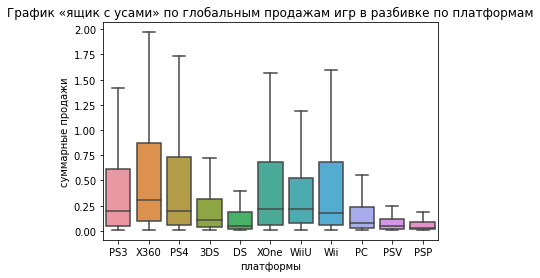

In [35]:
ax = sns.boxplot(data = data_actual, x = 'platform', y = 'sum_sales', showfliers=False)
ax.set_title('График «ящик с усами» по глобальным продажам игр в разбивке по платформам')
ax.set_ylabel('суммарные продажи')
ax.set_xlabel('платформы')
plt.show()

Если смотреть по платформам за период с 2012 по 2016 год, то самой прибыльной платформой является PS3, а PSP имеет меньше всего суммарных продаж. Выбросы - это наблюдения, которые значительно отличаются от остальных. В нашем случае это самые продаваемые игры, поэтому они выходят за пределы 2 квартиля. Их не стоит отбрасывать.

Коэффициент корреляции можду оценками экспертов и суммарными продажами:  0.3341517575509856


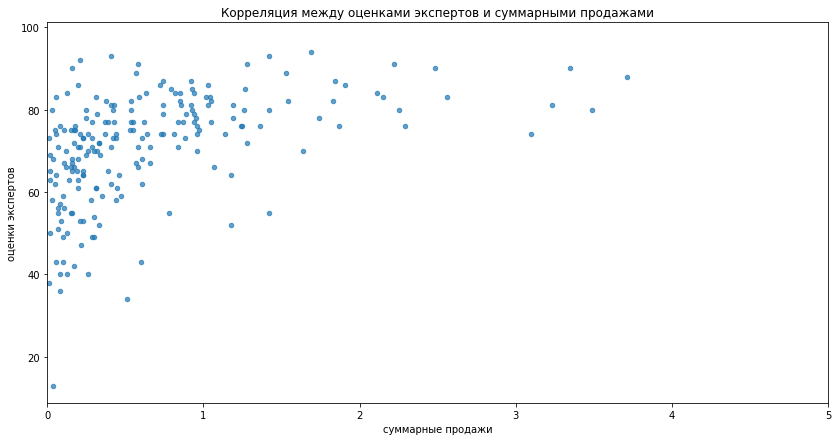

In [36]:
print('Коэффициент корреляции можду оценками экспертов и суммарными продажами: ', data_actual[data_actual['platform'] == 'PS3']['sum_sales'].corr(data_actual[data_actual['platform'] == 'PS3']['critic_score']))
data_actual[data_actual['platform'] == 'PS3'].plot(x = 'sum_sales', y='critic_score', kind='scatter', alpha=0.7, figsize=(14, 7))
plt.xlim(0, 5)
plt.title('Корреляция между оценками экспертов и суммарными продажами')
plt.xlabel('суммарные продажи')
plt.ylabel('оценки экспертов')
plt.show()

Коэффициент корреляции можду оценками пользователей и суммарными продажами:  -0.006205767686051522


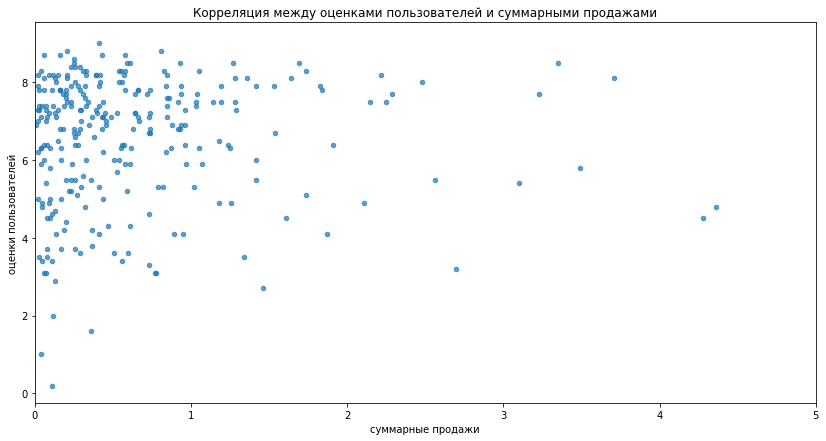

In [37]:
print('Коэффициент корреляции можду оценками пользователей и суммарными продажами: ', data_actual[data_actual['platform'] == 'PS3']['sum_sales'].corr(data_actual[data_actual['platform'] == 'PS3']['user_score']))
data_actual[data_actual['platform'] == 'PS3'].plot(x = 'sum_sales', y='user_score', kind='scatter', alpha=0.7, figsize=(14, 7))
plt.xlim(0, 5)
plt.title('Корреляция между оценками пользователей и суммарными продажами')
plt.xlabel('суммарные продажи')
plt.ylabel('оценки пользователей')
plt.show()

Получается нет взаимосявзи между оценками пользователей и суммой продаж, но есть взаимосвязь между оценками критиков и продажами, хоть она достаточно мала и равна 0.33.

Коэффициент корреляции между оценками экспертов и суммарными продажами:  0.406567902061781
Коэффициент корреляции между оценками пользователей и суммарными продажами:  -0.031957110204556376


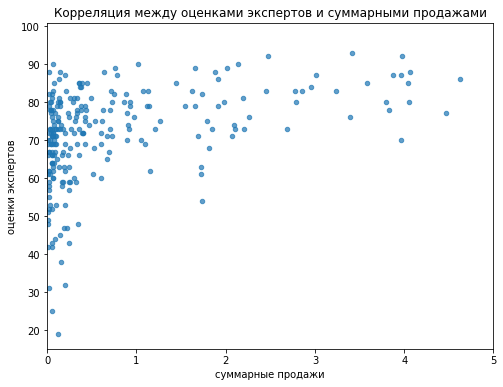

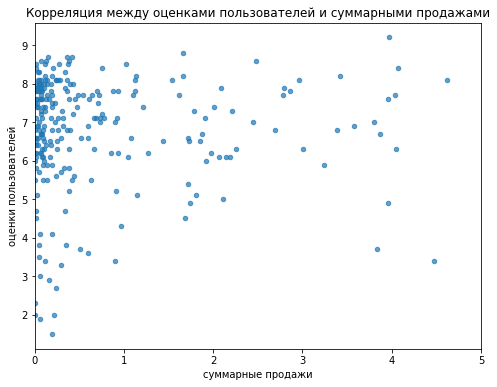

In [38]:
print('Коэффициент корреляции между оценками экспертов и суммарными продажами: ', data_actual[data_actual['platform'] == 'PS4']['sum_sales'].corr(data_actual[data_actual['platform'] == 'PS4']['critic_score']))
print('Коэффициент корреляции между оценками пользователей и суммарными продажами: ', data_actual[data_actual['platform'] == 'PS4']['sum_sales'].corr(data_actual[data_actual['platform'] == 'PS4']['user_score']))
data_actual[data_actual['platform'] == 'PS4'].plot(x = 'sum_sales', y='critic_score', kind='scatter', alpha=0.7, figsize=(8, 6))
plt.xlim(0, 5)
plt.title('Корреляция между оценками экспертов и суммарными продажами')
plt.xlabel('суммарные продажи')
plt.ylabel('оценки экспертов')
data_actual[data_actual['platform'] == 'PS4'].plot(x = 'sum_sales', y='user_score', kind='scatter', alpha=0.7, figsize=(8, 6))
plt.xlim(0, 5)
plt.title('Корреляция между оценками пользователей и суммарными продажами')
plt.xlabel('суммарные продажи')
plt.ylabel('оценки пользователей')
plt.show()

Коэффициент корреляции можду оценками экспертов и суммарными продажами:  0.41699832800840175
Коэффициент корреляции можду оценками пользователей и суммарными продажами:  -0.06892505328279412


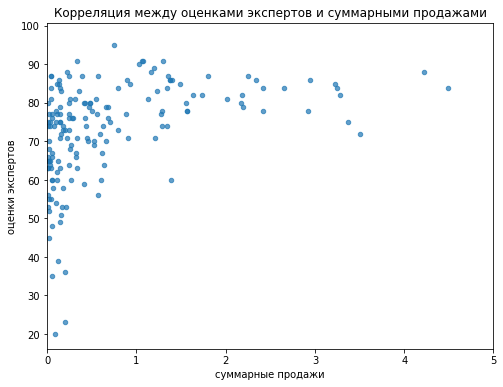

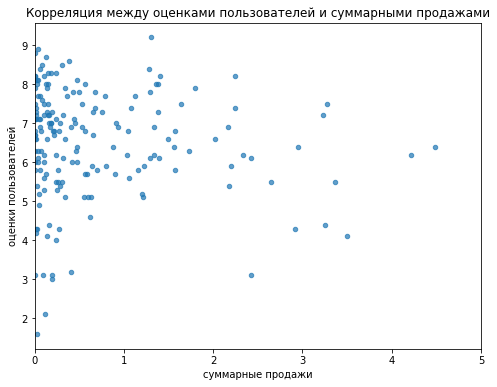

In [39]:
print('Коэффициент корреляции можду оценками экспертов и суммарными продажами: ', data_actual[data_actual['platform'] == 'XOne']['sum_sales'].corr(data_actual[data_actual['platform'] == 'XOne']['critic_score']))
print('Коэффициент корреляции можду оценками пользователей и суммарными продажами: ', data_actual[data_actual['platform'] == 'XOne']['sum_sales'].corr(data_actual[data_actual['platform'] == 'XOne']['user_score']))
data_actual[data_actual['platform'] == 'XOne'].plot(x = 'sum_sales', y='critic_score', kind='scatter', alpha=0.7, figsize=(8, 6))
plt.xlim(0, 5)
plt.title('Корреляция между оценками экспертов и суммарными продажами')
plt.xlabel('суммарные продажи')
plt.ylabel('оценки экспертов')
data_actual[data_actual['platform'] == 'XOne'].plot(x = 'sum_sales', y='user_score', kind='scatter', alpha=0.7, figsize=(8, 6))
plt.xlim(0, 5)
plt.title('Корреляция между оценками пользователей и суммарными продажами')
plt.xlabel('суммарные продажи')
plt.ylabel('оценки пользователей')
plt.show()

Таким образом, при исследовании платформ XOne и PS4 выводы сделанные в прошлом пункте подтвердились, а значит мнение экспертов имеет влияние на продаваемость игры. Причём внутри платформы XOne мнения критиков имеет большее влияние на продаваемость, чем у самой продаваемой платформы PS3.

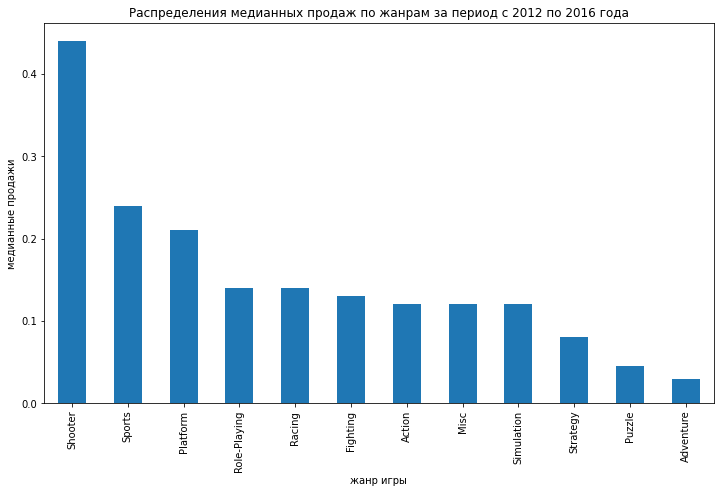

In [40]:
data_actual.groupby('genre')['sum_sales'].median().sort_values(ascending = False).plot(kind='bar', figsize = (12,7))
plt.title('Распределения медианных продаж по жанрам за период с 2012 по 2016 года')
plt.xlabel('жанр игры')
plt.ylabel('медианные продажи')
plt.show()

Получается, что самый продаваемый жанр Shooter, после него идёт жанр Sports, а Adventure имеет меньше всего продаж.

**Вывод** по главе исследовательский анализ данных.

- Был установлен актальный период с 2012 по 2016 года.
- Был установлен срок между появлением новой платформы и исчезновением старой, он составляет 3-6 лет.
- Были установлены потенциально прибыльные платформы PS4 и XOne, так как продажи по ним возрастаю, в отличие от других. Медиана у двух платформ равна примерно 0.2, также есть много выбросов доходящих в случае PS4 до 15 миллионов, а в случае XOne до 7 миллионов.
- Было установлено, что за период с 2012 по 2016 год самой прибыльной платформой является PS3, а PSP имеет меньше всего продаж.
- Было установлено, что рейтиг выставленный экспертами имеет влияние на продажи внутри платформы, что нельзя сказать о рейтинге пользователей.
- Была определен самый продаваемый жанр игр - Shooter.

## Портрет пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [41]:
data_actual

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,undefined,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,undefined,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16432,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01
16436,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01
16439,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01
16441,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,undefined,0.01


In [42]:
print('Топ 5 платформ Северной Америки: ')
x1 = data_actual.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').reset_index()
x1 = x1.sort_values(by = 'na_sales', ascending = False).iloc[:5]
print(x1)
print('Топ 5 платформ Европы: ')
x2 = data_actual.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').reset_index()
x2 = x2.sort_values(by = 'eu_sales', ascending = False).iloc[:5]
print(x2)
print('Топ 5 платформ Японии: ')
x3 = data_actual.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').reset_index()
x3 = x3.sort_values(by = 'jp_sales', ascending = False).iloc[:5]
print(x3)

Топ 5 платформ Северной Америки: 
   platform  na_sales
9      X360    140.05
4       PS4    108.74
3       PS3    103.38
10     XOne     93.12
0       3DS     55.31
Топ 5 платформ Европы: 
   platform  eu_sales
4       PS4    141.09
3       PS3    106.85
9      X360     74.52
10     XOne     51.59
0       3DS     42.64
Топ 5 платформ Японии: 
  platform  jp_sales
0      3DS     87.79
3      PS3     35.29
6      PSV     21.04
4      PS4     15.96
8     WiiU     13.01


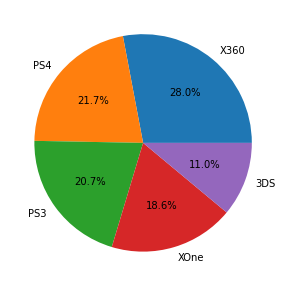

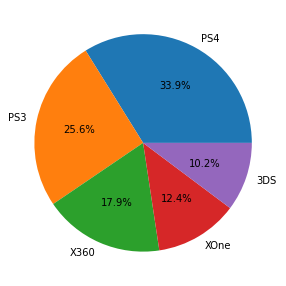

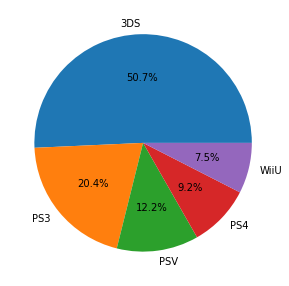

In [43]:
fig1, ax1 = plt.subplots(figsize = (5,5))
fig1, ax2 = plt.subplots(figsize = (5,5))
fig1, ax3 = plt.subplots(figsize = (5,5))
ax1.pie(x1['na_sales'], labels= x1['platform'], autopct='%1.1f%%')
ax2.pie(x2['eu_sales'], labels= x2['platform'], autopct='%1.1f%%')
ax3.pie(x3['jp_sales'], labels= x3['platform'], autopct='%1.1f%%')
plt.show()

Получается, что топ платформ примерно одинаковый для Северной Америки и Европы, что нельзя сказать о Японии, где самый высокий рейтинг у платформы, которая в Северной Америке и Европе занимает 5 место. Мы брали данные за актуальный период с 2012 по 2016 года.

In [44]:
print('Топ 5 жанров Северной Америки: ')
x1 = data_actual.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').reset_index()
x1 = x1.sort_values(by = 'na_sales', ascending = False).iloc[:5]
print(x1)
print('Топ 5 жанров Европы: ')
x2 = data_actual.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').reset_index()
x2 = x2.sort_values(by = 'eu_sales', ascending = False).iloc[:5]
print(x2)
print('Топ 5 жанров Японии: ')
x3 = data_actual.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').reset_index()
x3 = x3.sort_values(by = 'jp_sales', ascending = False).iloc[:5]
print(x3)

Топ 5 жанров Северной Америки: 
           genre  na_sales
0         Action    177.84
8        Shooter    144.77
10        Sports     81.53
7   Role-Playing     64.00
3           Misc     38.19
Топ 5 жанров Европы: 
           genre  eu_sales
0         Action    159.34
8        Shooter    113.47
10        Sports     69.08
7   Role-Playing     48.53
6         Racing     27.29
Топ 5 жанров Японии: 
          genre  jp_sales
7  Role-Playing     65.44
0        Action     52.80
3          Misc     12.86
9    Simulation     10.41
2      Fighting      9.44


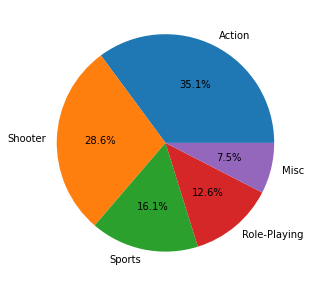

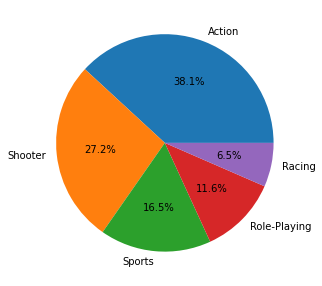

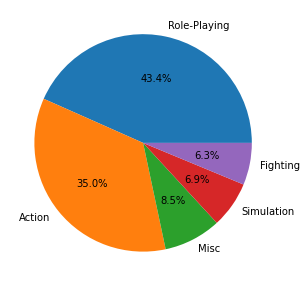

In [45]:
fig1, ax1 = plt.subplots(figsize = (5,5))
fig1, ax2 = plt.subplots(figsize = (5,5))
fig1, ax3 = plt.subplots(figsize = (5,5))
ax1.pie(x1['na_sales'], labels= x1['genre'], autopct='%1.1f%%')
ax2.pie(x2['eu_sales'], labels= x2['genre'], autopct='%1.1f%%')
ax3.pie(x3['jp_sales'], labels= x3['genre'], autopct='%1.1f%%')
plt.show()

Таким образом, топ игр Северной Америки и Европы опять совпадает, кроме 5 места. Первое и второе место занимают жанры Action и Shooter. В Японии Action занимает второе место, жанр Shooter вообще отсутствует, а первое место занимает Role-Playing.

Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности которой — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения.

Расшифровка некоторых рейтингов:

«EC» («Early childhood») — «Для детей младшего возраста»;

«E» («Everyone») — «Для всех»;

«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»;

«T» («Teen») — «Подросткам»;

«M» («Mature») — «Для взрослых»;

«AO» («Adults Only 18+») — «Только для взрослых».

In [46]:
print('Рейтинг ESRB Северной Америки: ')
x1 = data_actual.pivot_table(index = 'rating', values = 'na_sales', aggfunc = 'sum')
print(x1)
print('Рейтинг ESRB Европы: ')
x2 = data_actual.pivot_table(index = 'rating', values = 'eu_sales', aggfunc = 'sum')
print(x2)
print('Рейтинг ESRB Японии: ')
x3 = data_actual.pivot_table(index = 'rating', values = 'jp_sales', aggfunc = 'sum')
print(x3)

Рейтинг ESRB Северной Америки: 
           na_sales
rating             
E            114.37
E10+          75.70
M            231.57
T             66.02
undefined    103.31
Рейтинг ESRB Европы: 
           eu_sales
rating             
E            113.02
E10+          55.37
M            193.96
T             52.96
undefined     91.50
Рейтинг ESRB Японии: 
           jp_sales
rating             
E             28.33
E10+           8.19
M             21.20
T             26.02
undefined    108.84


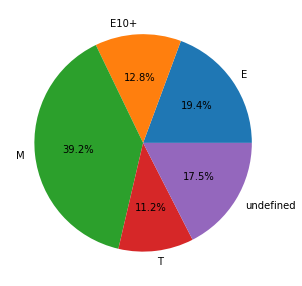

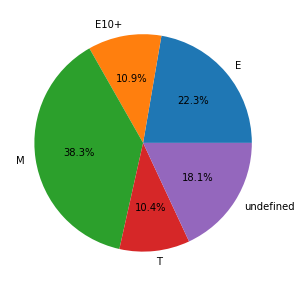

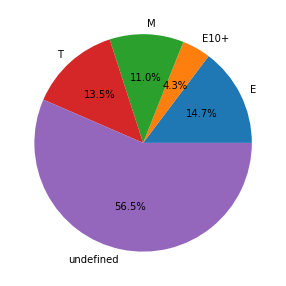

In [47]:
x1 = x1.reset_index()
x2 = x2.reset_index()
x3 = x3.reset_index()
fig1, ax1 = plt.subplots(figsize = (5,5))
fig1, ax2 = plt.subplots(figsize = (5,5))
fig1, ax3 = plt.subplots(figsize = (5,5))
ax1.pie(x1['na_sales'], labels= x1['rating'], autopct='%1.1f%%')
ax2.pie(x2['eu_sales'], labels= x1['rating'], autopct='%1.1f%%')
ax3.pie(x3['jp_sales'], labels= x1['rating'], autopct='%1.1f%%')
plt.show()

Судя по рейтингу Северной Америки и Европы пользователи чаще выбирают игры для взрослых. А пользователи Японии игры для всех.

**Вывод** портрета пользователя для каждого региона.

Северная Америка.
- предпочитают платформу X360
- предпочитают жанр Action
- предпочитают игры с рейтингом для взрослых

Европа.
- предпочитают платформу PS4
- предпочитают жанр Action
- предпочитают игры с рейтингом для взрослых

Япония.
- предпочитают платформу 3DS
- предпочитают жанр Role-Playing
- 56,5% составляет undefined, думаю это произошло, потому что рейтинг ESRB испоьзуется в США и Канаде, а пользователи Японии предпочитают игры собственного производства или игры, которые не оцениваются данным рейтингом.

## Проверка гипотез

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. 

**H0** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

**H1** Средние пользовательские рейтинги платформ Xbox One и PC разные.

In [48]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу
sred_scor1 = data_actual[(data_actual['platform'] == 'XOne')&(~data_actual['user_score'].isna())]['user_score']
sred_scor2 = data_actual[(data_actual['platform'] == 'PC')&(~data_actual['user_score'].isna())]['user_score']
results = st.ttest_ind(sred_scor1, sred_scor2, equal_var=False)

print('Средние пользовательские рейтинги платформ Xbox One:', sred_scor1.mean())
print('Средние пользовательские рейтинги платформ PC:', sred_scor2.mean())
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

Средние пользовательские рейтинги платформ Xbox One: 6.521428571428572
Средние пользовательские рейтинги платформ PC: 6.4286407766990274
p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


Так как нулевая гипотеза не отвергается, есть основания утверждать, что средние рейтинги двух платформ одинаковые.

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

**H0** Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.

**H1** Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [49]:
alpha = 0.05 # уровень статистической значимости
# если p-value окажется меньше него, отвергнем гипотезу
sred_scor1 = data_actual[(data_actual['genre'] == 'Action')&(~data_actual['user_score'].isna())]['user_score']
sred_scor2 = data_actual[(data_actual['genre'] == 'Sports')&(~data_actual['user_score'].isna())]['user_score']
results = st.ttest_ind(sred_scor1, sred_scor2, equal_var=False)

print('Средние пользовательские рейтинги жанра Action:', sred_scor1.mean())
print('Средние пользовательские рейтинги жанара Sports:', sred_scor2.mean())
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

Средние пользовательские рейтинги жанра Action: 6.825047801147227
Средние пользовательские рейтинги жанара Sports: 5.455670103092784
p-значение: 5.989458066467418e-20
Отвергаем нулевую гипотезу


Так как нулевая гипотеза отвергается с уровнем статестической значимости 0.05. Мы можем полагать, что средние пользовательские рейтинги значимо отличаются.

**Общий вывод**

В разделе предобработка данных.
- Убедились, что пристутствуют в столбцах 'Name', 'Year_of_Release', 'Critic_Score', 'User_Score', 'Rating'.
- Привели названия колонок к нижнему регистру.
- Удалили строки с пропусками в столбцах 'year_of_release', 'name'.
- Изменили типы данных в столбцах 'year_of_release' на *int*, 'user_score' на *float*.
- Заменили значение *tbd* на пропуски, для удобства дальнейшей работы.
- Заменила пропуски в столбце 'rating' на undefined
- Убедились в отсутствии явных.
- Был найден 1 неявный дупликат и удален.
- Просуммировали продажи во всех регионах и добавили их в отдельный столбец.

В разделе исследовательский анализ данных.
- Был установлен актальный период с 2012 по 2016 года.
- Был установлен срок между появлением новой платформы и исчезновением старой, он составляет 3-6 лет.
- Были установлены потенциально прибыльные платформы PS4 и XOne, так как продажи по ним возрастаю, в отличие от других. Медиана у двух платформ равна примерно 0.2, также есть много выбросов доходящих в случае PS4 до 15 миллионов, а в случае XOne до 7 миллионов.
- Было установлено, что за период с 2012 по 2016 год самой прибыльной платформой является PS3, а PSP имеет меньше всего продаж.
- Было установлено, что рейтиг выставленный экспертами имеет влияние на продажи внутри платформы, что нельзя сказать о рейтинге пользователей.
- Была определен самый продаваемый жанр игр - Shooter.

Были составлены портреты пользователей для каждого региона.

Северная Америка.
- предпочитают платформу X360
- предпочитают жанр Action
- предпочитают игры с рейтингом для взрослых

Европа.
- предпочитают платформу PS4
- предпочитают жанр Action
- предпочитают игры с рейтингом для взрослых

Япония.
- предпочитают платформу 3DS
- предпочитают жанр Role-Playing
- 56,5% составляет undefined, думаю это произошло, потому что рейтинг ESRB испоьзуется в США и Канаде, а пользователи Японии предпочитают игры собственного производства или игры, которые не оцениваются данным рейтингом.

При проверки гипотез мы можем утверждать, что пользовтельские рейтинги палтформ Xbox One и PC одинаковые, а пользовательский рейтинг жанров Action и Sports значительно отличаются.

Рекомендации на 2017 год.

Стоит отдавать предпочтения новым консолям. По жанрам стоит отдавать предпочтения Action, Shooter, Role-Playing. Стоит отдавать предпочтения играм для взрослых, это самый популярный рейтинг.

Также стоит учитывать, что продажи за 2016 год упали (хоть и есть пометка, что они не полные), скорее всего в 2017 году продажи также снизятся.